# Generalized Procrustes analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from ktch.datasets import load_landmark_mosquito_wings
from ktch.landmark import GeneralizedProcrustesAnalysis

## Load mosquito wing landmark dataset
from Rohlf and Slice 1990 _Syst. Zool._

In [2]:
data_landmark_mosquito_wings = load_landmark_mosquito_wings(as_frame=True)
data_landmark_mosquito_wings.coords

x       y
specimen_id coord_id                
1           0        -0.4933  0.0130
            1        -0.0777  0.0832
            2         0.2231  0.0861
            3         0.2641  0.0462
            4         0.2645  0.0261
...                      ...     ...
127         13       -0.2028  0.0371
            14        0.0490  0.0347
            15       -0.0422  0.0204
            16        0.1004 -0.0180
            17       -0.1473 -0.0057

[2286 rows x 2 columns]

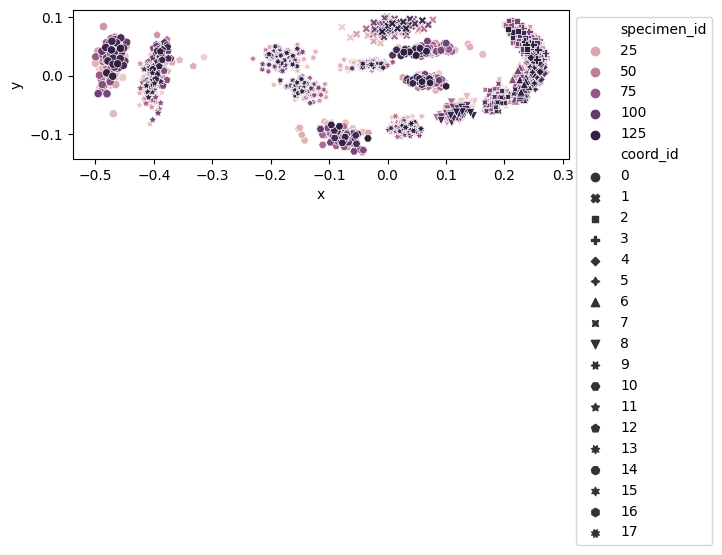

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(
    data = data_landmark_mosquito_wings.coords,
    x="x",y="y", 
    hue="specimen_id", style="coord_id",ax=ax
    )
ax.set_aspect('equal')
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

For applying generalized Procrustes analysis (GPA), 
we convert the configuration data into DataFrame of shape n_specimens x (n_landmarks*n_dim).

In [8]:
df_coords = data_landmark_mosquito_wings.coords.unstack().swaplevel(1, 0, axis=1).sort_index(axis=1)
df_coords.columns = [dim +"_"+ str(landmark_idx) for landmark_idx,dim in df_coords.columns]
df_coords

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,...,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17
specimen_id,,,,,,,,,,,,,,,,,,,,,
1,-0.4933,0.0130,-0.0777,0.0832,0.2231,0.0861,0.2641,0.0462,0.2645,0.0261,...,-0.1768,0.0341,0.0715,0.0509,-0.0540,0.0238,0.0575,-0.0059,-0.1401,-0.0240
2,-0.4814,0.0135,-0.0058,0.0780,0.2345,0.0644,0.2460,0.0467,0.2487,0.0281,...,-0.1808,0.0229,0.0484,0.0405,-0.0519,0.0164,0.0623,-0.0047,-0.1444,-0.0286
3,-0.4622,0.0159,0.0089,0.0689,0.2404,0.0545,0.2501,0.0424,0.2600,0.0230,...,-0.1724,0.0182,0.0577,0.0344,-0.0468,0.0115,0.0766,-0.0079,-0.1602,-0.0162
4,-0.4534,-0.0028,-0.0318,0.0738,0.2423,0.0808,0.2627,0.0559,0.2654,0.0322,...,-0.1536,0.0150,0.0617,0.0436,-0.0549,0.0217,0.0705,-0.0031,-0.1507,-0.0273
5,-0.4926,-0.0212,-0.0260,0.0708,0.2347,0.0679,0.2398,0.0584,0.2415,0.0355,...,-0.1374,0.0154,0.0762,0.0457,-0.0313,0.0170,0.0880,0.0037,-0.1318,-0.0278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-0.4703,-0.0009,0.0011,0.0805,0.2146,0.0747,0.2348,0.0585,0.2453,0.0350,...,-0.1624,0.0193,0.0557,0.0467,-0.0272,0.0190,0.0718,-0.0052,-0.1583,-0.0251
124,-0.4725,0.0441,0.0318,0.0808,0.2382,0.0419,0.2504,0.0237,0.2492,0.0019,...,-0.1724,0.0390,0.0667,0.0418,-0.0108,0.0205,0.0548,-0.0049,-0.1546,-0.0115
125,-0.4697,0.0196,0.0007,0.0850,0.2228,0.0760,0.2485,0.0540,0.2548,0.0319,...,-0.1816,0.0213,0.0376,0.0408,-0.0073,0.0137,0.0592,-0.0103,-0.1531,-0.0300


## GPA

In [4]:
gpa = GeneralizedProcrustesAnalysis().set_output(transform="pandas")

In [71]:
df_shapes = gpa.fit_transform(df_coords)
df_shapes

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,...,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17
specimen_id,,,,,,,,,,,,,,,,,,,,,
1,-0.488913,0.021159,-0.075651,0.083813,0.222655,0.081657,0.262641,0.041408,0.262701,0.021471,...,-0.174735,0.036786,0.071747,0.049290,-0.053145,0.024519,0.056916,-0.006796,-0.139317,-0.021437
2,-0.479850,0.030667,-0.002995,0.078029,0.236289,0.055873,0.247131,0.037801,0.249161,0.019145,...,-0.179578,0.029304,0.049746,0.038675,-0.051194,0.018213,0.062000,-0.006922,-0.145098,-0.023383
3,-0.461238,0.021194,0.009668,0.068674,0.240606,0.051631,0.250150,0.039440,0.259809,0.019959,...,-0.171907,0.020150,0.057987,0.033671,-0.046599,0.012014,0.076367,-0.008775,-0.160124,-0.014332
4,-0.451582,0.021733,-0.027671,0.075199,0.245617,0.067345,0.264582,0.041450,0.265988,0.017707,...,-0.152122,0.023242,0.063790,0.040074,-0.053488,0.024575,0.070026,-0.006899,-0.151522,-0.019031
5,-0.491092,0.019428,-0.020015,0.072475,0.238724,0.048169,0.243009,0.038313,0.242816,0.015425,...,-0.135231,0.026596,0.079447,0.039142,-0.029701,0.019466,0.087717,-0.003550,-0.133219,-0.016779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-0.468839,0.028646,0.006143,0.080164,0.218584,0.060969,0.237700,0.043553,0.246690,0.019470,...,-0.160671,0.029436,0.058442,0.043044,-0.025929,0.020642,0.071228,-0.009699,-0.159374,-0.015077
124,-0.473804,0.016670,0.027045,0.082425,0.235150,0.055559,0.248370,0.038112,0.248433,0.016301,...,-0.174200,0.028931,0.064108,0.045546,-0.011957,0.019822,0.054939,-0.001719,-0.153528,-0.020407
125,-0.468449,0.032047,0.002958,0.084844,0.224473,0.069955,0.249549,0.047306,0.255251,0.025073,...,-0.180752,0.026088,0.038626,0.039732,-0.006925,0.013867,0.058834,-0.011863,-0.153659,-0.025890


We create a DataFrame, called `df_shapes_vis`, of shape (n_specimens*n_landmarks) x n_dim to visualize the aligned shapes.

In [53]:
df_shapes_vis = df_shapes.copy()
df_shapes_vis.columns = pd.MultiIndex.from_tuples([[int(landmark_idx), dim] for dim, landmark_idx in [idx.split("_") for idx in df_shapes_vis.columns]], names=["coord_id","dim"])
df_shapes_vis.sort_index(axis=1, inplace=True)
df_shapes_vis = df_shapes_vis.swaplevel(0,1,axis=1).stack(level=1)
df_shapes_vis

dim                          x         y
specimen_id coord_id                    
1           0        -0.488913  0.021159
            1        -0.075651  0.083813
            2         0.222655  0.081657
            3         0.262641  0.041408
            4         0.262701  0.021471
...                        ...       ...
127         13       -0.203892  0.027493
            14        0.047226  0.036891
            15       -0.043017  0.018365
            16        0.100931 -0.013236
            17       -0.146563 -0.012573

[2286 rows x 2 columns]

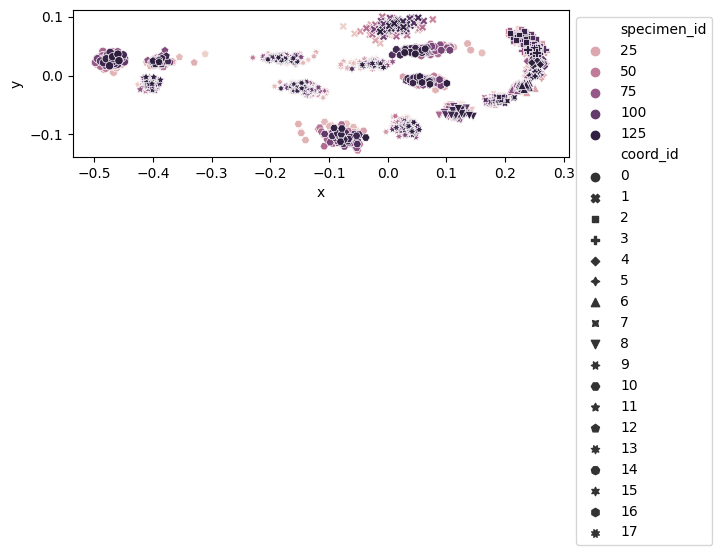

In [54]:
fig, ax = plt.subplots()
sns.scatterplot(
    data = df_shapes_vis,
    x="x",y="y", 
    hue="specimen_id", style="coord_id",ax=ax
    )
ax.set_aspect('equal')
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

## PCA

In [72]:
pca = PCA(n_components=10).set_output(transform="pandas")
df_pca = pca.fit_transform(df_shapes)

df_pca = df_pca.join(data_landmark_mosquito_wings.meta)
df_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,genus
specimen_id,,,,,,,,,,,
1,-0.003856,0.093210,-0.029908,-0.049589,0.007598,0.042657,-0.005370,0.010359,-0.011595,0.034991,AN
2,-0.029857,0.023434,-0.006114,0.017268,0.014229,0.014271,0.013344,0.021849,-0.011211,0.005069,AN
3,-0.012572,0.019728,0.034610,0.025665,0.005116,-0.017905,0.008511,-0.004312,0.001597,0.009884,AN
4,-0.001652,0.049890,0.034137,0.001013,-0.019706,-0.010102,-0.001692,-0.010425,0.021595,-0.006472,AN
5,0.026869,0.032989,-0.010228,0.051852,-0.016741,0.023749,0.015917,-0.000273,-0.013100,0.012755,AN
...,...,...,...,...,...,...,...,...,...,...,...
123,-0.007864,0.009853,0.006369,0.026082,0.025424,0.013786,-0.009967,-0.018669,0.000513,-0.005515,CX
124,-0.005360,-0.014451,0.014347,0.013199,-0.000102,0.001379,-0.002919,-0.009755,-0.020409,-0.017790,CX
125,-0.030056,-0.000885,-0.013455,-0.000542,0.008940,0.008503,-0.021390,-0.014563,-0.003408,-0.010083,CX


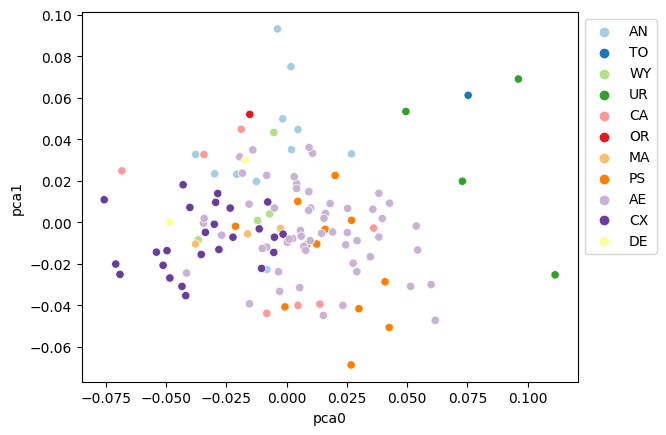

In [69]:
fig, ax = plt.subplots()
sns.scatterplot(
    data=df_pca, x="pca0", y = "pca1", 
    hue="genus",palette="Paired",
    ax=ax
    )
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))